In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/Advertising.csv',index_col=0)

In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
df.tail

<bound method NDFrame.tail of         TV  radio  newspaper  sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [7]:
data = df[['newspaper','sales']]

X = data['newspaper']

y = data['sales']

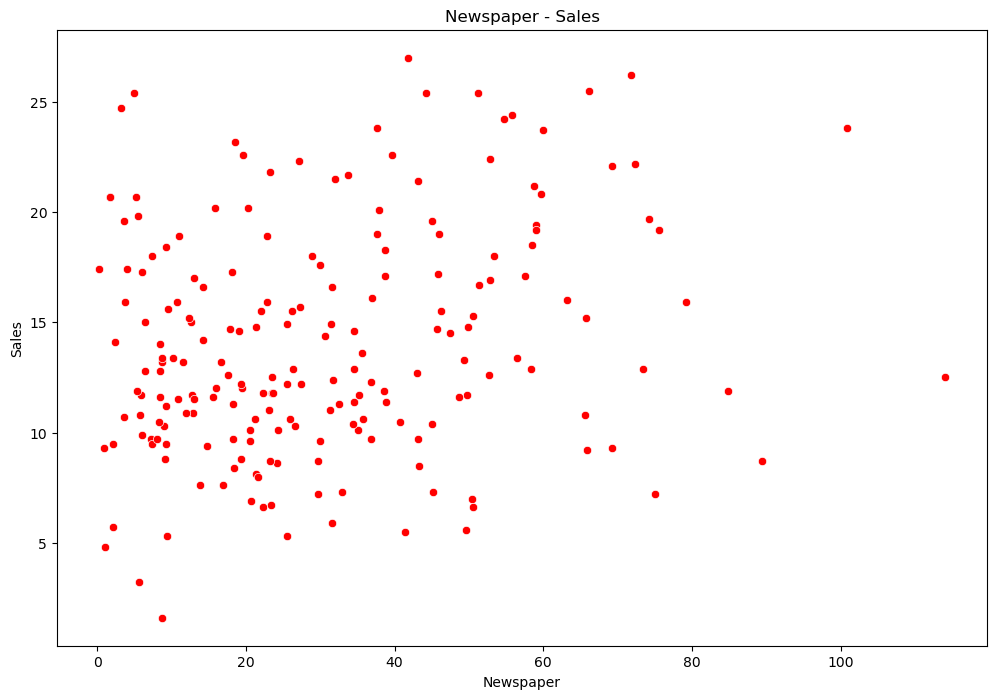

In [8]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = data , x = X , y = y , c = 'Red')
plt.title('Newspaper - Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()
X.shape

(200,)

In [13]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [14]:
X.shape

(200, 1)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30 , random_state = 100)

In [18]:
X_train.shape

(140, 1)

In [19]:
y_train.shape

(140, 1)

In [20]:
X_test.shape

(60, 1)

In [21]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
# Calculate the coefficient and intercept values

In [24]:
lr.intercept_

array([11.48439917])

In [25]:
lr.coef_

array([[0.07549167]])

In [26]:
# y = B0 + B1X from the formula 
# y = 11.45 + 0.07X

In [27]:
y_pred = lr.predict(X_test)

In [28]:
y_pred

array([[15.30427746],
       [11.884505  ],
       [14.94946663],
       [15.93840745],
       [13.23580582],
       [12.94893749],
       [13.41698581],
       [11.9298    ],
       [14.47386914],
       [13.53777248],
       [11.89205416],
       [17.08588077],
       [13.72650164],
       [12.20156999],
       [13.43963331],
       [12.09588166],
       [11.93734916],
       [14.14170581],
       [12.0430375 ],
       [14.39837747],
       [11.78636583],
       [13.84728831],
       [15.47790829],
       [14.40592664],
       [13.14521582],
       [11.7259725 ],
       [14.8890733 ],
       [13.93787831],
       [11.612735  ],
       [12.42049583],
       [14.17190247],
       [11.55234167],
       [15.1608433 ],
       [13.41698581],
       [12.87344582],
       [12.55638082],
       [13.74914914],
       [12.45069249],
       [12.47333999],
       [16.44420161],
       [15.83271912],
       [11.66557917],
       [15.06270413],
       [13.55287081],
       [12.36010249],
       [14

In [29]:
y_pred.shape

(60, 1)

In [30]:
# Draw the grand truth ( the real data) and Prediction data

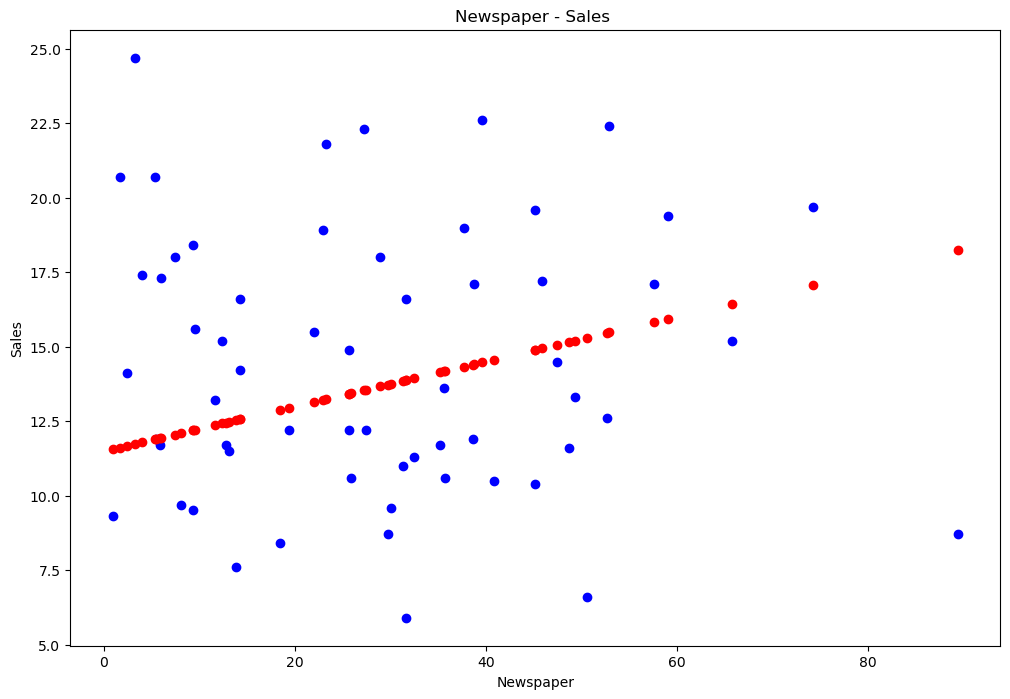

In [31]:
#Real data

fig , ax = plt.subplots(figsize = (12,8))
ax.scatter(X_test,y_test, label = "Grand Truth",c='Blue')

#Prediction data
ax.scatter(X_test,y_pred, label = "Prediction",c = 'Red')

plt.title("Newspaper - Sales ")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.show()

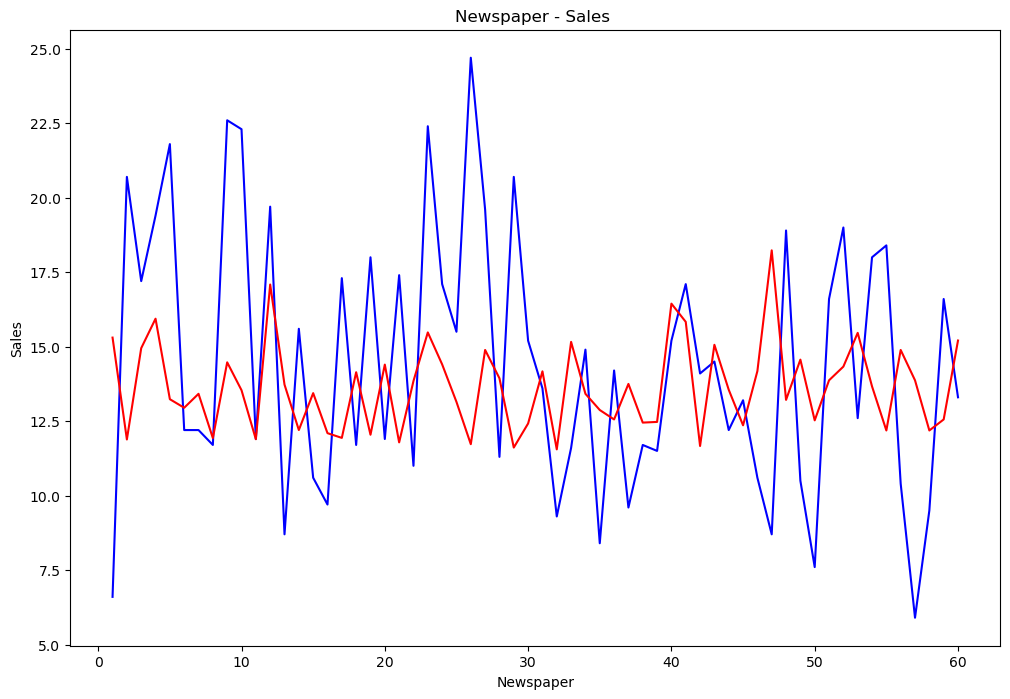

In [32]:
# see the change at each prediction point

indexs = range(1,61)

# Real data -> Grand truth

fig , ax = plt.subplots(figsize=(12,8))
ax.plot(indexs,y_test, label= "Grand Truth" , c ='Blue')

# Prediction 

ax.plot(indexs,y_pred, label = "Prediction" , c ='Red')
plt.title("Newspaper - Sales ")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.show()

In [35]:
# Draw the errors (Residual)

# Error = Residual -> y-y^ 

# Error = y_test - y_pred

import numpy as np

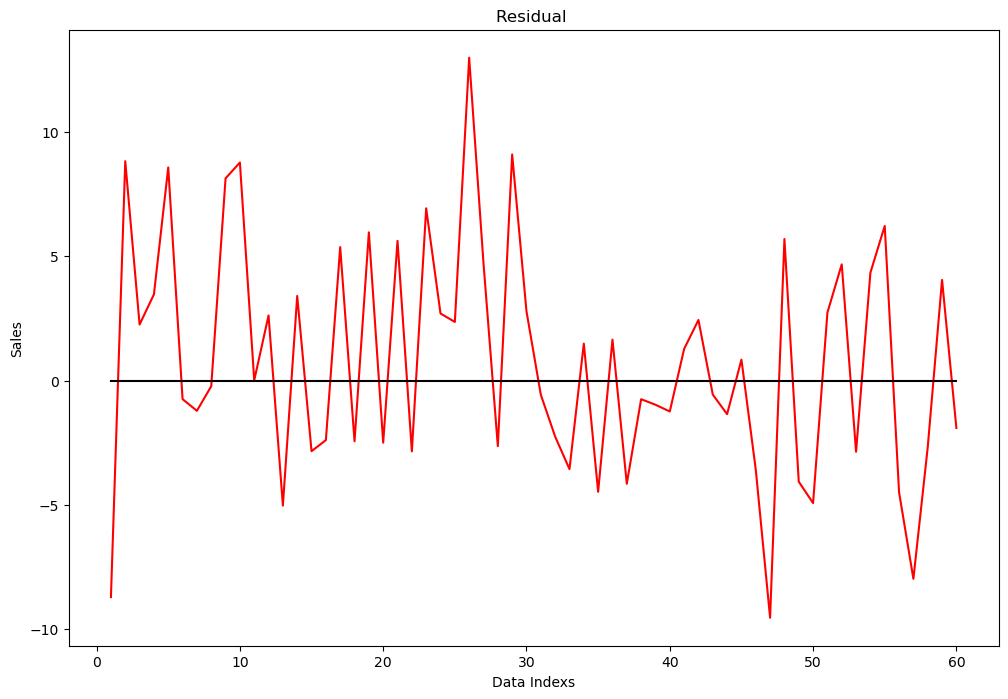

In [38]:
indexs = range(1,61)

fig , ax = plt.subplots(figsize =(12,8))
ax.plot(indexs , y_test-y_pred , label = "Residual",c = 'Red')

ax.plot(indexs , np.zeros(60), label="0" , c = 'Black')

plt.title("Residual ")
plt.xlabel("Data Indexs")
plt.ylabel("Sales")
plt.show()

In [39]:
#CHECKING THE MODEL ACCURACY

In [40]:
# RMSE = Root Mean Squared Error 

# RMSE = The square root of the MSE 

# R^2 = coefficients of determination

In [48]:
from sklearn.metrics import r2_score , mean_squared_error
import math

In [49]:
r_2 = r2_score(y_test,y_pred)
r_2

-0.1588989736629216

In [50]:
r_2*100

-15.88989736629216

In [51]:
mse = mean_squared_error(y_test,y_pred)
mse

22.783129716276214

In [52]:
RMSE = math.sqrt(mse)
RMSE

4.773167681558674

EXPLANATION AND COMMENT

R^2 = %-15 approximately

So our model is representing the data by %-15

RMSE = 4.77

This means that our model is making an average of 4.77 error when estimating